<a href="https://colab.research.google.com/github/TAUforPython/TMS-pain-analysis/blob/main/ML%20TMS%20pain%20timeseries%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tslearn -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.7/372.7 kB 7.7 MB/s eta 0:00:00


# Average Response timseries clustering

In [2]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pywt
from tslearn.clustering import TimeSeriesKMeans

# Load the data
link_url = 'https://raw.githubusercontent.com/TAUforPython/TMS-pain-analysis/refs/heads/main/test_datasets/raw_tms_timeseries_classification_arrays.csv'
raw_data_ts = pd.read_csv(link_url, sep=';')

# --- Data Cleaning ---
# The data uses commas as decimal separators, replace them with dots and convert to float
float_columns = ['avg_respone_right', 'avg_respone_left', 'interstimul_threshod', 'inhibition_threshold_right', 'inhibition_threshold_left']
for col in float_columns:
    raw_data_ts[col] = raw_data_ts[col].replace(',', '.', regex=True)
    raw_data_ts[col] = pd.to_numeric(raw_data_ts[col], errors='coerce')


In [3]:
raw_data_ts[raw_data_ts['patient_id'] == 'patient_ 13']

patient_id  interstimul_interval  avg_respone_right  avg_respone_left  \
348  patient_ 13                     2          40.750000         19.753333   
349  patient_ 13                     3          46.383333         15.658000   
350  patient_ 13                     4          75.616667         26.816667   
351  patient_ 13                     5          94.666667         65.266667   
352  patient_ 13                     6         113.866667         62.033333   
353  patient_ 13                     7         102.816667         71.233333   
354  patient_ 13                     8         110.300000         93.933333   
355  patient_ 13                    10          89.200000        118.650000   
356  patient_ 13                    12         138.983333         99.050000   
357  patient_ 13                    14         138.700000        115.780000   
358  patient_ 13                    17         144.333333         92.560000   
359  patient_ 13                    20         132.233333         96.240000   

     interstimul_threshod  inhibition_threshold_right  \
348                   1.0                        16.6   
349                   1.5                       -10.7   
350                   2.0                       -10.1   
351                   2.5                       -10.7   
352                   3.0                        -2.3   
353                   3.5                       -18.5   
354                   4.0                       -10.7   
355                   5.0                       -13.4   
356                   7.0                        -5.1   
357                   NaN                         NaN   
358                   NaN                         NaN   
359                   NaN                         NaN   

     inhibition_threshold_left  
348                       25.5  
349                       23.1  
350                       22.5  
351                       40.6  
352                       22.5  
353                       28.0  
354                        6.0  
355                       13.3  
356                       -8.6  
357                        NaN  
358                        NaN  
359                        NaN

In [4]:
link_url = 'https://raw.githubusercontent.com/TAUforPython/TMS-pain-analysis/refs/heads/main/test_datasets/tms_raw_data.csv'

raw_data = pd.read_csv(link_url, sep = ';')
raw_data.head(5)

patient_id  sex  age  pain_type  illnes_month  score_pain_reiting  \
0  patient_ 1    0   72        1.0         324.0                 9.0   
1  patient_ 2    1   60        0.0         120.0                 NaN   
2  patient_ 3    0   54        0.0         312.0                 7.0   
3  patient_ 4    0   25        0.0          60.0                 5.0   
4  patient_ 5    0   42        0.0          24.0                 8.0   

   score_osvestri  score_dn4  score_paint_detect  score_beck  ...  \
0            58.0        5.0                24.0        24.0  ...   
1             NaN        NaN                 NaN         NaN  ...   
2            38.0        7.0                24.0         9.0  ...   
3            22.0        2.0                 7.0         8.0  ...   
4            48.0        3.0                 7.0        22.0  ...   

   theshold_edge_right.1  theshold_edge_left.1  avg_avg_respone_right  \
0                   -0,6                  -7,8               140,7675   
1                   17,2                  21,2            73,48533333   
2                    4,3                   1,2                145,275   
3                    6,2                  23,8            66,66191667   
4                    4,7                 -0,26            59,29183333   

   avg_avg_respone_left  avg_interstimul_threshod  \
0           178,1633333                        61   
1           51,33366667                        46   
2              189,0625                        56   
3           88,53916667                        26   
4           59,76133333                        42   

   avg_inhibition_threshold_right  avg_inhibition_threshold_left  Unnamed: 51  \
0                              58                    3,277777778          NaN   
1                              40                    3,277777778          NaN   
2                              60                    3,277777778          NaN   
3                              33                    3,277777778          NaN   
4                              52                    3,277777778          NaN   

   Unnamed: 52  Unnamed: 53  
0          NaN          NaN  
1          NaN          NaN  
2          NaN          NaN  
3          NaN          NaN  
4          NaN          NaN  

[5 rows x 54 columns]

In [5]:
table_with_pain = pd.merge(
    raw_data_ts,
    raw_data[['patient_id', 'pain_type']].dropna(),
    on = 'patient_id', how = 'left'
)

In [6]:
table_with_pain.fillna(2.0)

patient_id  interstimul_interval  avg_respone_right  avg_respone_left  \
0    patient_ 1n                     2         164.488889         37.698333   
1    patient_ 1n                     3         156.600000         39.340000   
2    patient_ 1n                     4         139.187500         45.480000   
3    patient_ 1n                     5         146.750000         72.320000   
4    patient_ 1n                     6         159.637500         56.240000   
..           ...                   ...                ...               ...   
739  patient_ 47                    10         124.500000         72.600000   
740  patient_ 47                    12         119.911111         69.328571   
741  patient_ 47                    14         101.164444         75.928571   
742  patient_ 47                    17         148.150000         26.044286   
743  patient_ 47                    20         120.367500         28.537143   

     interstimul_threshod  inhibition_threshold_right  \
0                     1.0                        28.2   
1                     1.5                        -4.9   
2                     2.0                        28.2   
3                     2.5                        45.1   
4                     3.0                        -8.2   
..                    ...                         ...   
739                   5.0                        -0.9   
740                   7.0                        -0.9   
741                   2.0                         2.0   
742                   2.0                         2.0   
743                   2.0                         2.0   

     inhibition_threshold_left  pain_type  
0                         30.3        2.0  
1                         -4.1        2.0  
2                         15.5        2.0  
3                         44.1        2.0  
4                         30.3        2.0  
..                         ...        ...  
739                      -12.2        0.0  
740                       -3.3        0.0  
741                        2.0        0.0  
742                        2.0        0.0  
743                        2.0        0.0  

[744 rows x 8 columns]

In [7]:
# drop patient_12 - it's a outcome
raw_data_ts_clean = []
raw_data_ts_clean = raw_data_ts[raw_data_ts['patient_id'] != 'patient_ 12']

#drop patient_26 and patient_31 and patient_20 (no data for average response)
#raw_data_ts_clean = raw_data_ts[raw_data_ts['patient_id'] != 'patient_ 20']
#raw_data_ts_clean = raw_data_ts[raw_data_ts['patient_id'] != 'patient_ 26']
#raw_data_ts_clean = raw_data_ts[raw_data_ts['patient_id'] != 'patient_ 31']

#raw_data_ts = []

raw_data_ts = raw_data_ts_clean

In [8]:

# --- Data Preparation ---
# Focus on complete cases for avg_respone_right and avg_respone_left
# Pivot data to get time series for each patient
columns_to_analyze = ['avg_respone_right', 'avg_respone_left']
data_for_analysis = raw_data_ts.dropna(subset=columns_to_analyze)

# Create a pivot table for each response variable
ts_data_right = data_for_analysis.pivot(index='patient_id', columns='interstimul_interval', values='avg_respone_right')
ts_data_left = data_for_analysis.pivot(index='patient_id', columns='interstimul_interval', values='avg_respone_left')

# Combine the two variables into a single multi-variate time series dataset
# Fill NaNs with a placeholder value (e.g., 0) if necessary, though dropping them above should avoid this
ts_data_combined = pd.concat([ts_data_right.add_suffix('_right'), ts_data_left.add_suffix('_left')], axis=1)
ts_data_clean = ts_data_combined.dropna() # Ensure no NaNs remain after combining

print(f"Shape of clean time series data (patients, time_points): {ts_data_clean.shape}")
print(f"Time points: {ts_data_clean.columns.tolist()}")

Shape of clean time series data (patients, time_points): (60, 24)
Time points: ['2_right', '3_right', '4_right', '5_right', '6_right', '7_right', '8_right', '10_right', '12_right', '14_right', '17_right', '20_right', '2_left', '3_left', '4_left', '5_left', '6_left', '7_left', '8_left', '10_left', '12_left', '14_left', '17_left', '20_left']


In [9]:
ts_data_clean.head(5)

interstimul_interval  2_right     3_right     4_right  5_right  6_right  \
patient_id                                                                
patient_ 1            124.300   95.240000  190.280000  156.400   144.80   
patient_ 10            52.040   27.825000  104.775000  152.575   133.70   
patient_ 10n           26.348   21.330000   48.850000   66.580    74.99   
patient_ 11            33.715  186.333333  169.166667  181.200   175.80   
patient_ 11n           37.950   34.540000  105.650000  125.510   148.26   

interstimul_interval  7_right  8_right  10_right  12_right  14_right  ...  \
patient_id                                                            ...   
patient_ 1             141.16   172.54    122.40    163.50    155.00  ...   
patient_ 10            275.00   172.40    231.00    278.25    221.00  ...   
patient_ 10n            66.01    71.92     82.59     81.07     77.21  ...   
patient_ 11            166.00   158.30    146.58    146.28    106.36  ...   
patient_ 11n           140.80   155.13    150.81    143.80    153.20  ...   

interstimul_interval      4_left      5_left      6_left      7_left  \
patient_id                                                             
patient_ 1             75.740000  149.040000  153.040000  178.160000   
patient_ 10            24.354545   31.736364   40.309091   47.490909   
patient_ 10n           66.830000   94.120000  122.240000  106.320000   
patient_ 11           124.066667  107.033333  105.283333  137.200000   
patient_ 11n           46.800000   62.970000   63.760000   68.590000   

interstimul_interval      8_left     10_left     12_left     14_left  \
patient_id                                                             
patient_ 1            190.400000  244.400000  179.480000  218.400000   
patient_ 10            51.354545   62.109091   52.218182   53.863636   
patient_ 10n          105.980000  126.350000  148.020000  150.160000   
patient_ 11           153.633333  161.500000  166.833333  133.940000   
patient_ 11n           78.980000   69.610000   65.070000   76.680000   

interstimul_interval     17_left     20_left  
patient_id                                    
patient_ 1            277.000000  262.750000  
patient_ 10            59.445455   57.636364  
patient_ 10n          135.430000  135.150000  
patient_ 11            78.100000   65.280000  
patient_ 11n           68.040000   76.330000  

[5 rows x 24 columns]


--- Method 1: DWT Clustering ---
DWT clustering completed for 60 patients.

--- Method 2: DTW Clustering ---


/usr/local/lib/python3.12/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 2 is too high: all coefficients will experience boundary effects.
  warnings.warn(


DTW clustering completed for 60 patients.


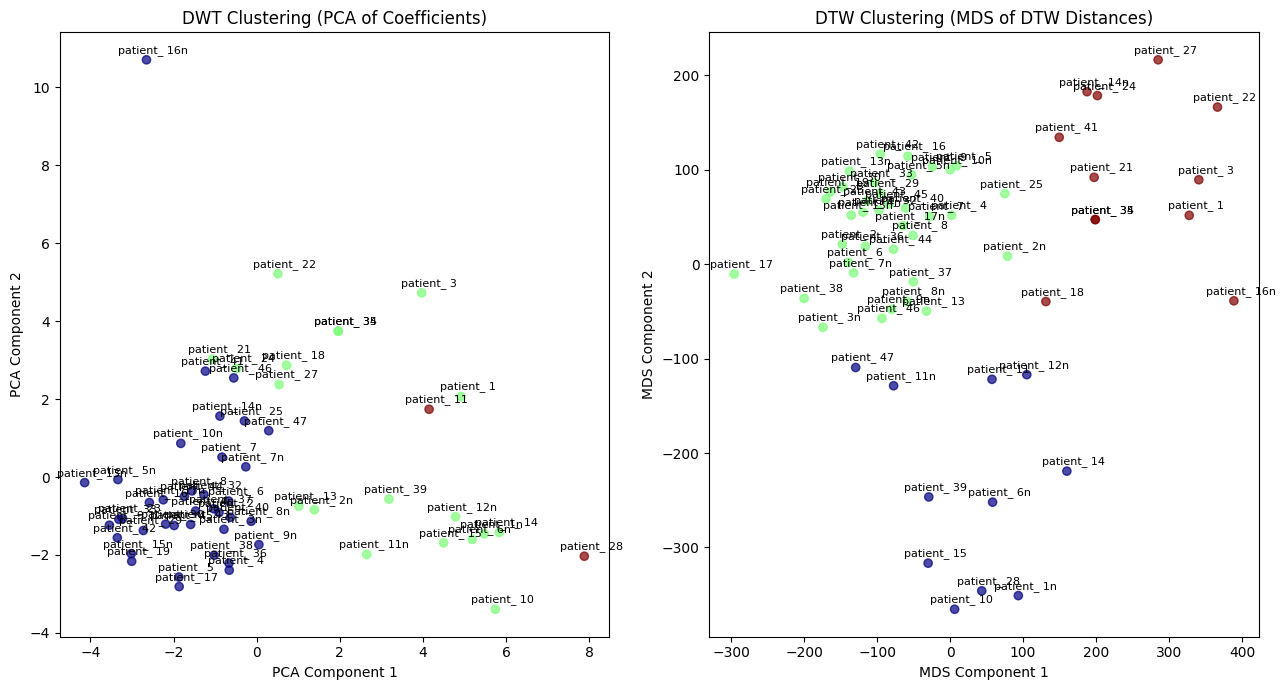


DWT Clustering Silhouette Score: 0.215
DTW Clustering Silhouette Score: 0.504


In [10]:
estimated_clusters_num = 3


# --- Method 1: Discrete Wavelet Transform (DWT) Clustering ---
print("\n--- Method 1: DWT Clustering ---")
wavelet_coeffs = []
valid_indices = []
for idx in ts_data_clean.index:
    series = ts_data_clean.loc[idx].values
    # Check if series contains only NaNs or is invalid (though dropna above should prevent this)
    if not np.isnan(series).all() and len(series) > 0:
        # Perform DWT
        # The series length is 24. For 'db4' wavelet, level=2 is appropriate to avoid boundary effects.
        coeffs = pywt.wavedec(series, 'db4', level=2)
        # Flatten coefficients
        flat_coeffs = np.concatenate(coeffs)
        wavelet_coeffs.append(flat_coeffs)
        valid_indices.append(idx)
    else:
        print(f"Skipping patient {idx} due to invalid data.")

# Convert to numpy array
X_dwt = np.array(wavelet_coeffs)
if X_dwt.size > 0:
    scaler_dwt = StandardScaler()
    X_dwt_scaled = scaler_dwt.fit_transform(X_dwt)

    kmeans_dwt = KMeans(n_clusters=estimated_clusters_num, random_state=42)
    labels_dwt = kmeans_dwt.fit_predict(X_dwt_scaled)
    print(f"DWT clustering completed for {len(valid_indices)} patients.")
else:
    print("No valid data points found for DWT clustering.")
    labels_dwt = np.array([])
    X_dwt_scaled = np.array([]).reshape(0, 1) # Dummy array for plotting

# --- Method 2: Semi-Metric (Dynamic Time Warping - DTW) Clustering ---
print("\n--- Method 2: DTW Clustering ---")
# Use only the valid indices from DWT processing to ensure consistency
if len(valid_indices) > 0:
    ts_data_for_dtw = ts_data_clean.loc[valid_indices]
    # Prepare data for tslearn (shape: n_ts, n_timestamps, n_features)
    X_dtw = ts_data_for_dtw.values.reshape(ts_data_for_dtw.shape[0], ts_data_for_dtw.shape[1], 1)

    ts_km_dtw = TimeSeriesKMeans(n_clusters=estimated_clusters_num, metric="dtw", max_iter=100, random_state=42)
    labels_dtw = ts_km_dtw.fit_predict(X_dtw)
    print(f"DTW clustering completed for {len(valid_indices)} patients.")
else:
    print("No valid data points found for DTW clustering.")
    labels_dtw = np.array([])
    X_dtw = np.array([]).reshape(0, 1, 1) # Dummy array for plotting

# --- Visualization ---
fig, axes = plt.subplots(1, 2, figsize=(13, 7))

# DWT: Plot cluster centers in feature space (first 2 PCA components) if data exists
if X_dwt_scaled.size > 0 and X_dwt_scaled.shape[0] > 1: # Need more than one point for PCA
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    X_dwt_pca = pca.fit_transform(X_dwt_scaled)
    scatter1 = axes[0].scatter(X_dwt_pca[:, 0], X_dwt_pca[:, 1], c=labels_dwt, cmap='jet', alpha=0.7)
    axes[0].set_title("DWT Clustering (PCA of Coefficients)")
    axes[0].set_xlabel("PCA Component 1")
    axes[0].set_ylabel("PCA Component 2")
    #plt.colorbar(scatter1, ax=axes[0])

    # Add patient_id labels to the DWT PCA plot
    for i, patient_id in enumerate(valid_indices):
        axes[0].annotate(patient_id, (X_dwt_pca[i, 0], X_dwt_pca[i, 1]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)


# DTW: Plot cluster centers in feature space (first 2 MDS components of DTW distance) if data exists
if X_dtw.shape[0] > 1: # Need more than one point for MDS
    from sklearn.manifold import MDS
    # Calculate DTW distance matrix
    n = X_dtw.shape[0]
    dtw_dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            from tslearn.metrics import dtw as tslearn_dtw
            dist = tslearn_dtw(X_dtw[i].squeeze(), X_dtw[j].squeeze())
            dtw_dist_matrix[i, j] = dist
            dtw_dist_matrix[j, i] = dist
    mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
    X_dtw_mds = mds.fit_transform(dtw_dist_matrix)
    scatter2 = axes[1].scatter(X_dtw_mds[:, 0], X_dtw_mds[:, 1], c=labels_dtw, cmap='jet', alpha=0.7)
    axes[1].set_title("DTW Clustering (MDS of DTW Distances)")
    axes[1].set_xlabel("MDS Component 1")
    axes[1].set_ylabel("MDS Component 2")
    #plt.colorbar(scatter2, ax=axes[1])

    # Add patient_id labels to the DTW MDS plot
    for i, patient_id in enumerate(valid_indices):
        axes[1].annotate(patient_id, (X_dtw_mds[i, 0], X_dtw_mds[i, 1]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)


plt.tight_layout()
plt.show()

# Print Silhouette Scores (optional, requires distance matrices and more than one cluster)
from sklearn.metrics import silhouette_score
if len(np.unique(labels_dwt)) > 1 and X_dwt_scaled.size > 0 and X_dwt_scaled.shape[0] > 1:
    try:
        sil_score_dwt = silhouette_score(X_dwt_scaled, labels_dwt)
        print(f"\nDWT Clustering Silhouette Score: {sil_score_dwt:.3f}")
    except Exception as e:
        print(f"\nCould not calculate DWT Silhouette Score: {e}")
else:
    print("\nDWT Silhouette Score: Not calculated (insufficient data or clusters).")

if len(np.unique(labels_dtw)) > 1 and X_dtw.shape[0] > 1:
    try:
        sil_score_dtw = silhouette_score(dtw_dist_matrix, labels_dtw, metric='precomputed')
        print(f"DTW Clustering Silhouette Score: {sil_score_dtw:.3f}")
    except Exception as e:
        print(f"Could not calculate DTW Silhouette Score: {e}")
else:
    print("DTW Silhouette Score: Not calculated (insufficient data or clusters).")

In [11]:
pca.explained_variance_ratio_

array([0.21346692, 0.15517766])

## Visualize Individual Time Series for Each DTW Cluster

Visualizing individual time series for each DTW cluster...


/tmp/ipython-input-4050208837.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_data_clean.loc[:, 'DTW_Cluster'] = dtW_cluster_series


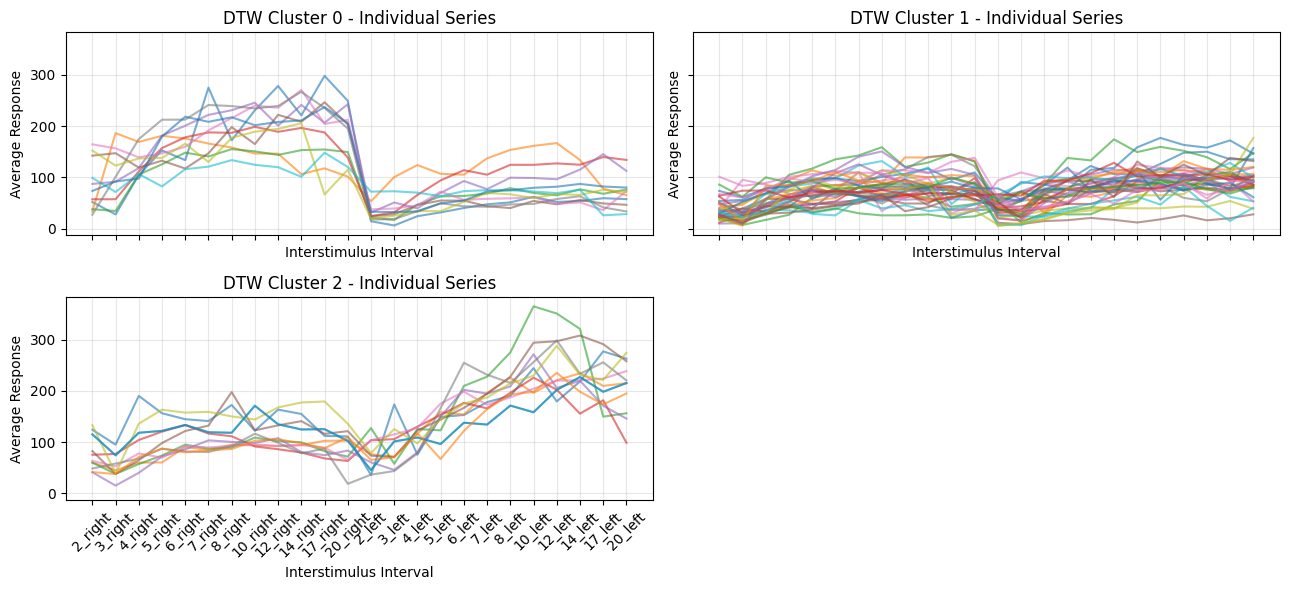

Individual time series visualizations for DTW clusters generated.


In [12]:
# Ensure DTW_Cluster is in ts_data_clean before proceeding
dtW_cluster_series = pd.Series(labels_dtw, index=valid_indices, name='DTW_Cluster')
ts_data_clean.loc[:, 'DTW_Cluster'] = dtW_cluster_series

# Get the columns that represent time series data, using ts_data_combined for robustness
ts_columns_for_plot = ts_data_combined.columns.tolist()

n_clusters = ts_data_clean['DTW_Cluster'].nunique()

# Determine the layout for subplots
rows = int(np.ceil(n_clusters / 2)) if n_clusters > 1 else 1
cols = 2 if n_clusters > 1 else 1

fig, axes = plt.subplots(rows, cols, figsize=(13, 3 * rows), sharex=True, sharey=True)
axes = axes.flatten() # Flatten the array of axes for easy iteration

print("Visualizing individual time series for each DTW cluster...")

for i in sorted(ts_data_clean['DTW_Cluster'].unique()):
    cluster_data = ts_data_clean[ts_data_clean['DTW_Cluster'] == i]

    ax = axes[i]
    for patient_id in cluster_data.index:
        ax.plot(ts_columns_for_plot, cluster_data.loc[patient_id, ts_columns_for_plot], alpha=0.6)

    ax.set_title(f'DTW Cluster {i} - Individual Series')
    ax.set_xlabel('Interstimulus Interval')
    ax.set_ylabel('Average Response')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3)

# Hide any unused subplots
for j in range(n_clusters, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print("Individual time series visualizations for DTW clusters generated.")

#Average inhibition threshold clustering


--- Method 1: DWT Clustering ---
DWT clustering completed for 61 patients.

--- Method 2: DTW Clustering ---


/usr/local/lib/python3.12/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 2 is too high: all coefficients will experience boundary effects.
  warnings.warn(


DTW clustering completed for 61 patients.


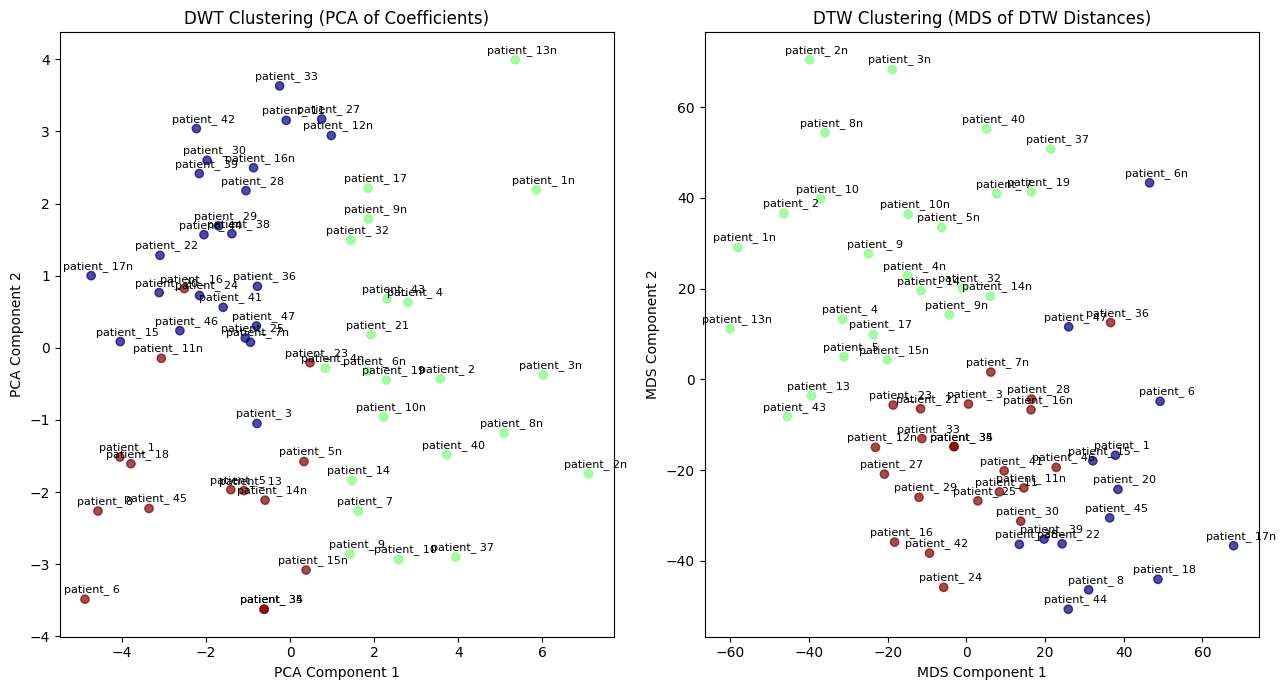


DWT Clustering Silhouette Score: 0.116
DTW Clustering Silhouette Score: 0.202


In [13]:
'''
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pywt
from tslearn.clustering import TimeSeriesKMeans

# Load the data
link_url = 'https://raw.githubusercontent.com/TAUforPython/BioMedAI/refs/heads/main/test_datasets/tms_raw_data_timeseries.csv'
raw_data_ts = pd.read_csv(link_url, sep=';')

# --- Data Cleaning ---
# The data uses commas as decimal separators, replace them with dots and convert to float
float_columns = ['avg_respone_right', 'avg_respone_left', 'interstimul_threshod', 'inhibition_threshold_right', 'inhibition_threshold_left']
for col in float_columns:
    raw_data_ts[col] = raw_data_ts[col].replace(',', '.', regex=True)
    raw_data_ts[col] = pd.to_numeric(raw_data_ts[col], errors='coerce')
'''
# --- Data Preparation ---
# Focus on complete cases for avg_respone_right and avg_respone_left
# Pivot data to get time series for each patient
columns_to_analyze = ['inhibition_threshold_right', 'inhibition_threshold_left']
data_for_analysis = []
data_for_analysis = raw_data_ts.dropna(subset=columns_to_analyze)

# Create a pivot table for each response variable
ts_data_right = []
ts_data_left = []
ts_data_right = data_for_analysis.pivot(index='patient_id', columns='interstimul_threshod', values='inhibition_threshold_right')
ts_data_left = data_for_analysis.pivot(index='patient_id', columns='interstimul_threshod', values='inhibition_threshold_left')

# Combine the two variables into a single multi-variate time series dataset
# Fill NaNs with a placeholder value (e.g., 0) if necessary, though dropping them above should avoid this
ts_data_combined = []
ts_data_clean = []
ts_data_combined = pd.concat([ts_data_right.add_suffix('_right'), ts_data_left.add_suffix('_left')], axis=1)
ts_data_clean = ts_data_combined.dropna() # Ensure no NaNs remain after combining

#print(f"Shape of clean time series data (patients, time_points): {ts_data_clean.shape}")
#print(f"Time points: {ts_data_clean.columns.tolist()}")

# --- Method 1: Discrete Wavelet Transform (DWT) Clustering ---
print("\n--- Method 1: DWT Clustering ---")
wavelet_coeffs = []
valid_indices = []
for idx in ts_data_clean.index:
    series = ts_data_clean.loc[idx].values
    # Check if series contains only NaNs or is invalid (though dropna above should prevent this)
    if not np.isnan(series).all() and len(series) > 0:
        # Perform DWT
        # The series length is 24. For 'db4' wavelet, level=2 is appropriate to avoid boundary effects.
        coeffs = pywt.wavedec(series, 'db4', level=2)
        # Flatten coefficients
        flat_coeffs = np.concatenate(coeffs)
        wavelet_coeffs.append(flat_coeffs)
        valid_indices.append(idx)
    else:
        print(f"Skipping patient {idx} due to invalid data.")

# Convert to numpy array
X_dwt = np.array(wavelet_coeffs)
if X_dwt.size > 0:
    scaler_dwt = StandardScaler()
    X_dwt_scaled = scaler_dwt.fit_transform(X_dwt)

    kmeans_dwt = KMeans(n_clusters=estimated_clusters_num, random_state=42)
    labels_dwt = kmeans_dwt.fit_predict(X_dwt_scaled)
    print(f"DWT clustering completed for {len(valid_indices)} patients.")
else:
    print("No valid data points found for DWT clustering.")
    labels_dwt = np.array([])
    X_dwt_scaled = np.array([]).reshape(0, 1) # Dummy array for plotting

# --- Method 2: Semi-Metric (Dynamic Time Warping - DTW) Clustering ---
print("\n--- Method 2: DTW Clustering ---")
# Use only the valid indices from DWT processing to ensure consistency
if len(valid_indices) > 0:
    ts_data_for_dtw = ts_data_clean.loc[valid_indices]
    # Prepare data for tslearn (shape: n_ts, n_timestamps, n_features)
    X_dtw = ts_data_for_dtw.values.reshape(ts_data_for_dtw.shape[0], ts_data_for_dtw.shape[1], 1)

    ts_km_dtw = TimeSeriesKMeans(n_clusters=estimated_clusters_num, metric="dtw", max_iter=100, random_state=42)
    labels_dtw = ts_km_dtw.fit_predict(X_dtw)
    print(f"DTW clustering completed for {len(valid_indices)} patients.")
else:
    print("No valid data points found for DTW clustering.")
    labels_dtw = np.array([])
    X_dtw = np.array([]).reshape(0, 1, 1) # Dummy array for plotting

# --- Visualization ---
fig, axes = plt.subplots(1, 2, figsize=(13, 7))

# DWT: Plot cluster centers in feature space (first 2 PCA components) if data exists
if X_dwt_scaled.size > 0 and X_dwt_scaled.shape[0] > 1: # Need more than one point for PCA
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    X_dwt_pca = pca.fit_transform(X_dwt_scaled)
    scatter1 = axes[0].scatter(X_dwt_pca[:, 0], X_dwt_pca[:, 1], c=labels_dwt, cmap='jet', alpha=0.7)
    axes[0].set_title("DWT Clustering (PCA of Coefficients)")
    axes[0].set_xlabel("PCA Component 1")
    axes[0].set_ylabel("PCA Component 2")
    #plt.colorbar(scatter1, ax=axes[0])

    # Add patient_id labels to the DWT PCA plot
    for i, patient_id in enumerate(valid_indices):
        axes[0].annotate(patient_id, (X_dwt_pca[i, 0], X_dwt_pca[i, 1]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)


# DTW: Plot cluster centers in feature space (first 2 MDS components of DTW distance) if data exists
if X_dtw.shape[0] > 1: # Need more than one point for MDS
    from sklearn.manifold import MDS
    # Calculate DTW distance matrix
    n = X_dtw.shape[0]
    dtw_dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            from tslearn.metrics import dtw as tslearn_dtw
            dist = tslearn_dtw(X_dtw[i].squeeze(), X_dtw[j].squeeze())
            dtw_dist_matrix[i, j] = dist
            dtw_dist_matrix[j, i] = dist
    mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
    X_dtw_mds = mds.fit_transform(dtw_dist_matrix)
    scatter2 = axes[1].scatter(X_dtw_mds[:, 0], X_dtw_mds[:, 1], c=labels_dtw, cmap='jet', alpha=0.7)
    axes[1].set_title("DTW Clustering (MDS of DTW Distances)")
    axes[1].set_xlabel("MDS Component 1")
    axes[1].set_ylabel("MDS Component 2")
    #plt.colorbar(scatter2, ax=axes[1])

    # Add patient_id labels to the DTW MDS plot
    for i, patient_id in enumerate(valid_indices):
        axes[1].annotate(patient_id, (X_dtw_mds[i, 0], X_dtw_mds[i, 1]), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)


plt.tight_layout()
plt.show()

# Print Silhouette Scores (optional, requires distance matrices and more than one cluster)
from sklearn.metrics import silhouette_score
if len(np.unique(labels_dwt)) > 1 and X_dwt_scaled.size > 0 and X_dwt_scaled.shape[0] > 1:
    try:
        sil_score_dwt = silhouette_score(X_dwt_scaled, labels_dwt)
        print(f"\nDWT Clustering Silhouette Score: {sil_score_dwt:.3f}")
    except Exception as e:
        print(f"\nCould not calculate DWT Silhouette Score: {e}")
else:
    print("\nDWT Silhouette Score: Not calculated (insufficient data or clusters).")

if len(np.unique(labels_dtw)) > 1 and X_dtw.shape[0] > 1:
    try:
        sil_score_dtw = silhouette_score(dtw_dist_matrix, labels_dtw, metric='precomputed')
        print(f"DTW Clustering Silhouette Score: {sil_score_dtw:.3f}")
    except Exception as e:
        print(f"Could not calculate DTW Silhouette Score: {e}")
else:
    print("DTW Silhouette Score: Not calculated (insufficient data or clusters).")

# Compare two clustering results


Extract and align cluster labels (DTW and DWT) by patient ID from the 'average response' and 'inhibition threshold' analyses. Compute Adjusted Rand Index (ARI) to quantify the similarity between the two sets of DTW and DWT cluster labels. Finally, create two heatmaps to visualize the mapping of patients between DTW clusters and DWT clusters from both analyses.

In [14]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pywt
from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import adjusted_rand_score
import seaborn as sns

In [15]:
(labels_dwt)

array([2, 1, 1, 0, 2, 0, 2, 1, 1, 2, 0, 2, 2, 0, 1, 0, 2, 1, 1, 1, 0, 1,
       0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 2, 0, 0, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1], dtype=int32)

In [16]:
(labels_dtw)

array([0, 1, 1, 2, 2, 2, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 0, 1, 1, 1, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 0, 0, 1, 1, 1, 2,
       2, 1, 0, 0, 2, 0, 1, 1, 1, 0, 0, 1, 2, 0, 1, 1, 1])

In [17]:
# --- Function to clean and prepare data (re-usable for both analyses) ---
def prepare_data(raw_data_df, columns_to_analyze, pivot_value_col, pivot_index_col):
    # The data uses commas as decimal separators, replace them with dots and convert to float
    float_columns = ['avg_respone_right', 'avg_respone_left', 'interstimul_threshod', 'inhibition_threshold_right', 'inhibition_threshold_left']
    for col in float_columns:
        raw_data_df[col] = raw_data_df[col].replace(',', '.', regex=True)
        raw_data_df[col] = pd.to_numeric(raw_data_df[col], errors='coerce')

    data_for_analysis = raw_data_df.dropna(subset=columns_to_analyze)

    # Create pivot tables for each response variable
    ts_data_right = data_for_analysis.pivot(index='patient_id', columns=pivot_index_col, values=columns_to_analyze[0])
    ts_data_left = data_for_analysis.pivot(index='patient_id', columns=pivot_index_col, values=columns_to_analyze[1])

    # Combine the two variables
    ts_data_combined = pd.concat([ts_data_right.add_suffix('_right'), ts_data_left.add_suffix('_left')], axis=1)
    ts_data_clean = ts_data_combined.dropna()
    return ts_data_clean

'''
# --- 2. For 'Average Response' analysis ---
print("Processing Average Response data...")
link_url = 'https://raw.githubusercontent.com/TAUforPython/BioMedAI/refs/heads/main/test_datasets/tms_raw_data_timeseries.csv'
raw_data_ts_avg_resp = pd.read_csv(link_url, sep=';')
'''

columns_to_analyze_avg_resp = ['avg_respone_right', 'avg_respone_left']
pivot_index_col_avg_resp = 'interstimul_interval'
#ts_data_clean_avg_resp = prepare_data(raw_data_ts_avg_resp.copy(), columns_to_analyze_avg_resp, 'avg_respone', pivot_index_col_avg_resp)
ts_data_clean_avg_resp = prepare_data(raw_data_ts_clean.copy(), columns_to_analyze_avg_resp, 'avg_respone', pivot_index_col_avg_resp)


# 2d. Perform DWT clustering for 'Average Response'
avg_resp_wavelet_coeffs = []
avg_resp_valid_indices = []
for idx in ts_data_clean_avg_resp.index:
    series = ts_data_clean_avg_resp.loc[idx].values
    if not np.isnan(series).all() and len(series) > 0:
        coeffs = pywt.wavedec(series, 'db4', level=2) # Using level=2 as before
        flat_coeffs = np.concatenate(coeffs)
        avg_resp_wavelet_coeffs.append(flat_coeffs)
        avg_resp_valid_indices.append(idx)

X_dwt_avg_resp = np.array(avg_resp_wavelet_coeffs)
scaler_dwt_avg_resp = StandardScaler()
X_dwt_scaled_avg_resp = scaler_dwt_avg_resp.fit_transform(X_dwt_avg_resp)

kmeans_dwt_avg_resp = KMeans(n_clusters=3, random_state=42) # Added n_init to suppress warning
avg_resp_labels_dwt = kmeans_dwt_avg_resp.fit_predict(X_dwt_scaled_avg_resp)

# 2e. The DTW cluster labels for average response are already available
# from the previous run in 'dtW_cluster_series'. Let's ensure it's properly named.
avg_resp_dtw_labels = dtW_cluster_series.copy()
avg_resp_dtw_labels.name = 'Avg_Resp_DTW_Cluster'

# --- 3. For 'Inhibition Threshold' analysis ---
print("Processing Inhibition Threshold data...")
# The variables `labels_dwt`, `labels_dtw`, and `valid_indices` in the kernel state
# currently hold the results from the *last* executed analysis, which was Inhibition Threshold.

# 3d. Extract DWT and DTW labels from the current kernel state
inh_thresh_dwt_labels = pd.Series(labels_dwt, index=valid_indices, name='Inh_Thresh_DWT_Cluster')
inh_thresh_dtw_labels = pd.Series(labels_dtw, index=valid_indices, name='Inh_Thresh_DTW_Cluster')

# --- 4. Align all cluster labels by patient ID ---
print("Aligning cluster labels...")
# Create series for average response DWT labels
avg_resp_dwt_labels_series = pd.Series(avg_resp_labels_dwt, index=avg_resp_valid_indices, name='Avg_Resp_DWT_Cluster')

# Combine all series into a single DataFrame
aligned_cluster_labels = pd.concat([
    avg_resp_dtw_labels,
    avg_resp_dwt_labels_series,
    inh_thresh_dtw_labels,
    inh_thresh_dwt_labels
], axis=1, join='outer')

# Fill NaNs with a placeholder, e.g., -1, for patients not present in a specific analysis
aligned_cluster_labels.fillna(-1, inplace=True)

print("Aligned Cluster Labels DataFrame:")
print(aligned_cluster_labels.head())
print(f"Shape of aligned_cluster_labels: {aligned_cluster_labels.shape}")

Processing Inhibition Threshold data...
Aligning cluster labels...
Aligned Cluster Labels DataFrame:
              Avg_Resp_DTW_Cluster  Avg_Resp_DWT_Cluster  \
patient_ 1                     2.0                   1.0   
patient_ 10                    0.0                   1.0   
patient_ 10n                   1.0                   0.0   
patient_ 11                    0.0                   2.0   
patient_ 11n                   0.0                   1.0   

              Inh_Thresh_DTW_Cluster  Inh_Thresh_DWT_Cluster  
patient_ 1                         0                       2  
patient_ 10                        1                       1  
patient_ 10n                       1                       1  
patient_ 11                        2                       0  
patient_ 11n                       2                       2  
Shape of aligned_cluster_labels: (61, 4)


/usr/local/lib/python3.12/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 2 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [18]:
aligned_cluster_labels = aligned_cluster_labels.astype(int)
aligned_cluster_labels.describe()

Avg_Resp_DTW_Cluster  Avg_Resp_DWT_Cluster  Inh_Thresh_DTW_Cluster  \
count             61.000000             61.000000               61.000000   
mean               0.983607              0.360656                1.131148   
std                0.670617              0.578296                0.763226   
min               -1.000000             -1.000000                0.000000   
25%                1.000000              0.000000                1.000000   
50%                1.000000              0.000000                1.000000   
75%                1.000000              1.000000                2.000000   
max                2.000000              2.000000                2.000000   

       Inh_Thresh_DWT_Cluster  
count               61.000000  
mean                 0.852459  
std                  0.792382  
min                  0.000000  
25%                  0.000000  
50%                  1.000000  
75%                  1.000000  
max                  2.000000

The previous step successfully extracted and aligned the cluster labels. The next logical step, according to the task description, is to compute the Adjusted Rand Index (ARI) to quantify the similarity between the clusterings and then visualize the relationships with heatmaps. I will calculate ARI for relevant pairs of cluster labels and then generate the required heatmaps using the `aligned_cluster_labels` DataFrame.




--- Adjusted Rand Index (ARI) Scores ---
Average Response (DTW vs DWT): 0.581
Inhibition Threshold (DTW vs DWT): 0.400
DTW (Avg_Resp vs Inh_Thresh): 0.106
DWT (Avg_Resp vs Inh_Thresh): -0.011

--- Visualizing Cluster Mappings with Heatmaps ---


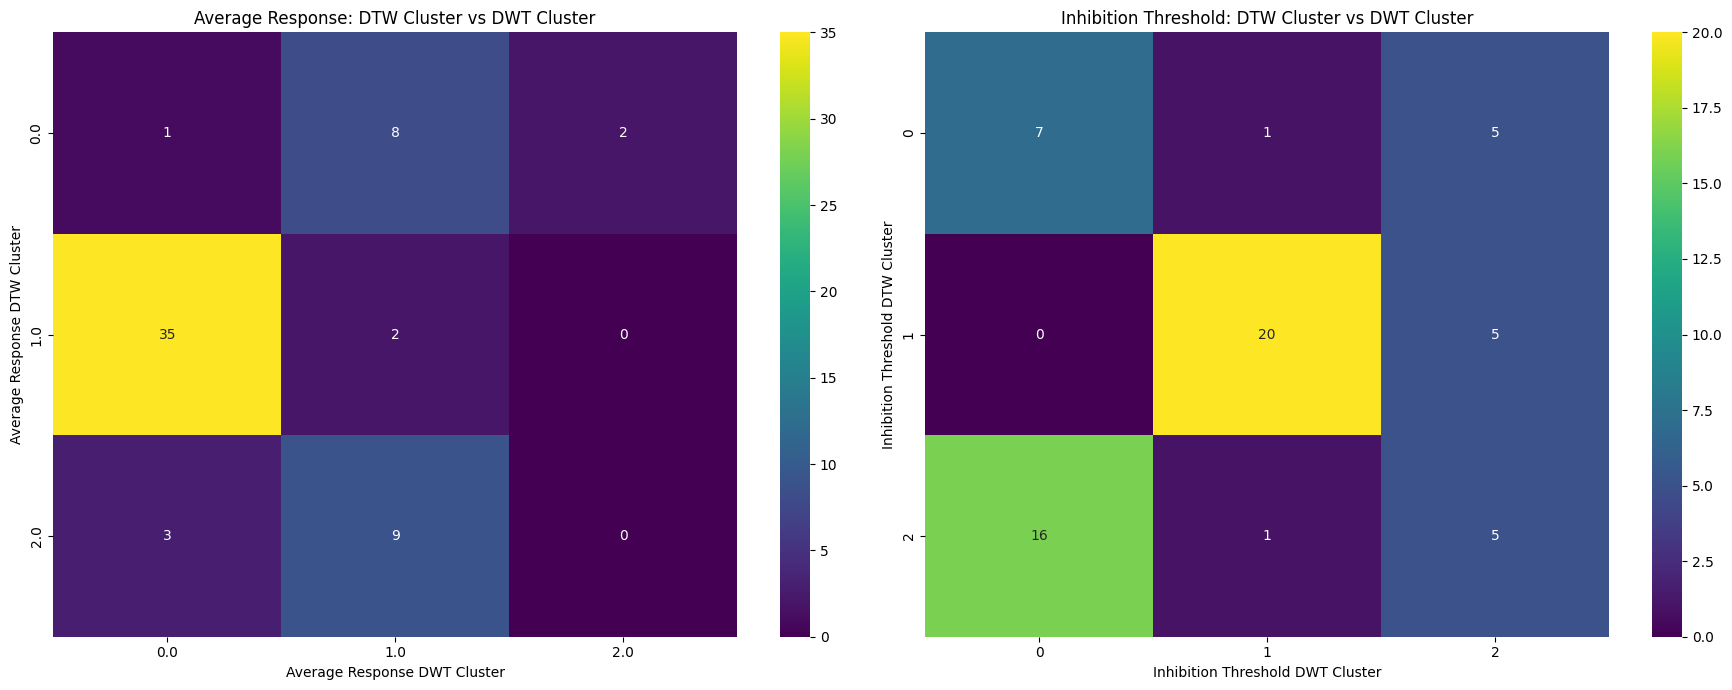

In [19]:
# Filter out patients not present in all analyses (those with -1 placeholder)
# For ARI calculation, we should only compare patients that are present in BOTH sets.
# For heatmaps, we can directly use the counts including -1 or exclude them if they are not meaningful clusters.

aligned_cluster_labels_filtered = aligned_cluster_labels[aligned_cluster_labels != -1].dropna()

print("\n--- Adjusted Rand Index (ARI) Scores ---")

def calculate_ari_for_non_negative_labels(labels_true, labels_pred):
    # Filter out -1 (missing) labels before calculating ARI
    valid_indices = (labels_true != -1) & (labels_pred != -1)
    if sum(valid_indices) < 2: # ARI requires at least two data points
        return np.nan
    return adjusted_rand_score(labels_true[valid_indices], labels_pred[valid_indices])

# ARI for Average Response: DTW vs DWT
ari_avg_resp_dtw_dwt = calculate_ari_for_non_negative_labels(
    aligned_cluster_labels_filtered['Avg_Resp_DTW_Cluster'],
    aligned_cluster_labels_filtered['Avg_Resp_DWT_Cluster']
)
print(f"Average Response (DTW vs DWT): {ari_avg_resp_dtw_dwt:.3f}")

# ARI for Inhibition Threshold: DTW vs DWT
ari_inh_thresh_dtw_dwt = calculate_ari_for_non_negative_labels(
    aligned_cluster_labels_filtered['Inh_Thresh_DTW_Cluster'],
    aligned_cluster_labels_filtered['Inh_Thresh_DWT_Cluster']
)
print(f"Inhibition Threshold (DTW vs DWT): {ari_inh_thresh_dtw_dwt:.3f}")

# ARI for DTW across analyses: Average Response DTW vs Inhibition Threshold DTW
ari_dtw_across_analyses = calculate_ari_for_non_negative_labels(
    aligned_cluster_labels_filtered['Avg_Resp_DTW_Cluster'],
    aligned_cluster_labels_filtered['Inh_Thresh_DTW_Cluster']
)
print(f"DTW (Avg_Resp vs Inh_Thresh): {ari_dtw_across_analyses:.3f}")

# ARI for DWT across analyses: Average Response DWT vs Inhibition Threshold DWT
ari_dwt_across_analyses = calculate_ari_for_non_negative_labels(
    aligned_cluster_labels_filtered['Avg_Resp_DWT_Cluster'],
    aligned_cluster_labels_filtered['Inh_Thresh_DWT_Cluster']
)
print(f"DWT (Avg_Resp vs Inh_Thresh): {ari_dwt_across_analyses:.3f}")

print("\n--- Visualizing Cluster Mappings with Heatmaps ---")

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Heatmap 1: Average Response DTW vs Average Response DWT
# Use all original values for mapping, including -1 if present, to show full patient distribution
mapping_avg_resp = pd.crosstab(
    aligned_cluster_labels_filtered['Avg_Resp_DTW_Cluster'],
    aligned_cluster_labels_filtered['Avg_Resp_DWT_Cluster']
)
sns.heatmap(mapping_avg_resp, annot=True, fmt='d', cmap='viridis', ax=axes[0])
axes[0].set_title('Average Response: DTW Cluster vs DWT Cluster')
axes[0].set_xlabel('Average Response DWT Cluster')
axes[0].set_ylabel('Average Response DTW Cluster')

# Heatmap 2: Inhibition Threshold DTW vs Inhibition Threshold DWT
mapping_inh_thresh = pd.crosstab(
    aligned_cluster_labels_filtered['Inh_Thresh_DTW_Cluster'],
    aligned_cluster_labels_filtered['Inh_Thresh_DWT_Cluster']
)
sns.heatmap(mapping_inh_thresh, annot=True, fmt='d', cmap='viridis', ax=axes[1])
axes[1].set_title('Inhibition Threshold: DTW Cluster vs DWT Cluster')
axes[1].set_xlabel('Inhibition Threshold DWT Cluster')
axes[1].set_ylabel('Inhibition Threshold DTW Cluster')

plt.tight_layout()
plt.show()

## Visualize_Cross_Analysis_Cluster_Comparisons

Create heatmaps to visualize the mapping of patients between DTW clusters across analyses and DWT clusters across analyses.


Visualize the mapping of patients between DTW clusters across analyses and DWT clusters across analyses using heatmaps. I will generate the heatmaps as instructed, leveraging the `aligned_cluster_labels` DataFrame from the previous step.



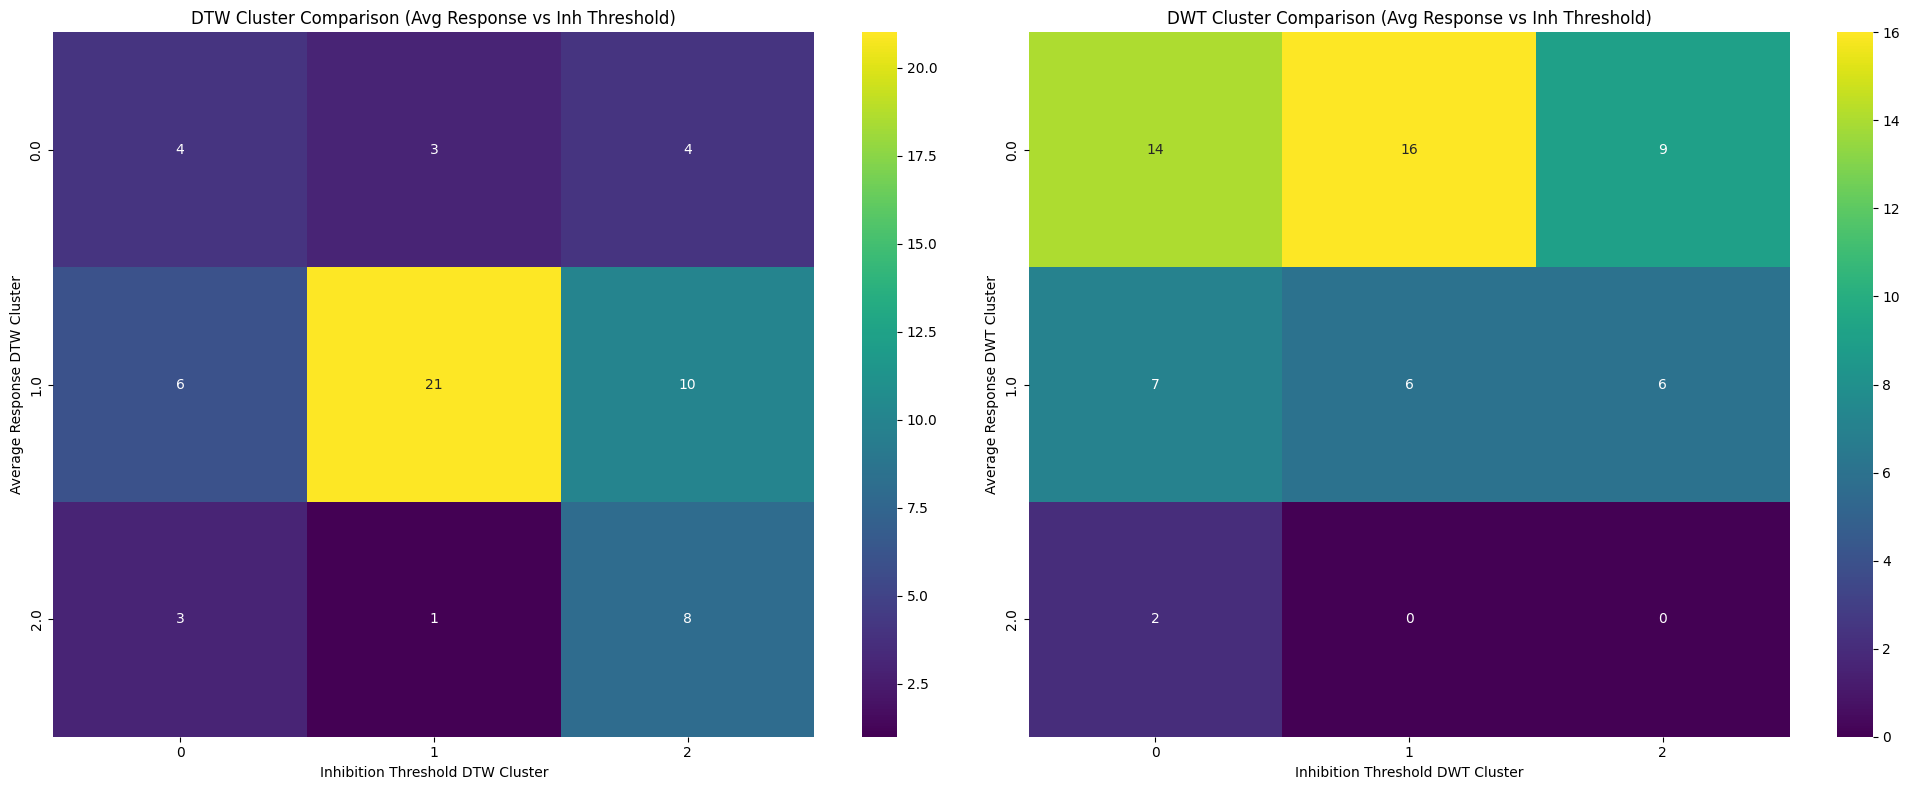

In [20]:

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Heatmap 1: DTW Cluster Comparison (Average Response vs Inhibition Threshold)
mapping_dtw_cross_analysis = pd.crosstab(
    aligned_cluster_labels_filtered['Avg_Resp_DTW_Cluster'],
    aligned_cluster_labels_filtered['Inh_Thresh_DTW_Cluster']
)
sns.heatmap(mapping_dtw_cross_analysis, annot=True, fmt='d', cmap='viridis', ax=axes[0])
axes[0].set_title('DTW Cluster Comparison (Avg Response vs Inh Threshold)')
axes[0].set_xlabel('Inhibition Threshold DTW Cluster')
axes[0].set_ylabel('Average Response DTW Cluster')

# Heatmap 2: DWT Cluster Comparison (Average Response vs Inhibition Threshold)
mapping_dwt_cross_analysis = pd.crosstab(
    aligned_cluster_labels_filtered['Avg_Resp_DWT_Cluster'],
    aligned_cluster_labels_filtered['Inh_Thresh_DWT_Cluster']
)
sns.heatmap(mapping_dwt_cross_analysis, annot=True, fmt='d', cmap='viridis', ax=axes[1])
axes[1].set_title('DWT Cluster Comparison (Avg Response vs Inh Threshold)')
axes[1].set_xlabel('Inhibition Threshold DWT Cluster')
axes[1].set_ylabel('Average Response DWT Cluster')

plt.tight_layout()
plt.show()


# look from DFA to find the time when inhibition start

In [21]:
# Imports
!pip install hurst --quiet
!pip install MFDFA --quiet
from MFDFA import MFDFA

In [22]:
xx = raw_data_ts_clean[raw_data_ts_clean['patient_id'] == 'patient_ 1n']

In [23]:
tt = xx['interstimul_interval']
yy = xx['avg_respone_left']

tt = np.array(tt)
yy = np.array(yy)

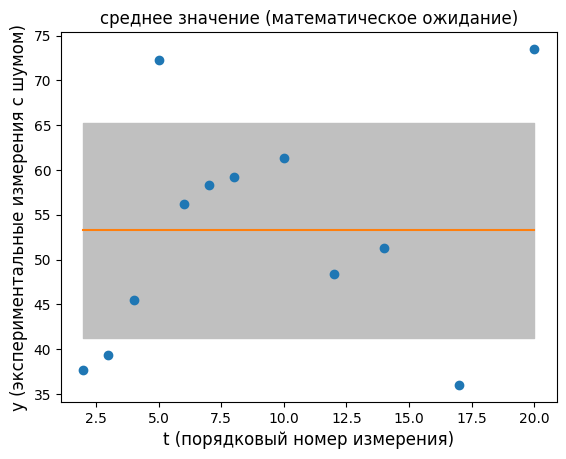

In [24]:

plt.plot(tt, yy, 'o')
plt.plot([tt[0], tt[-1]],[np.mean(yy), np.mean(yy)])
plt.xlabel('t (порядковый номер измерения)', fontsize=12)
plt.ylabel('y (экспериментальные измерения с шумом)', fontsize=12)
plt.title("среднее значение (математическое ожидание)")
plt.fill_between(tt, np.mean(yy) + np.std(yy), np.mean(yy) - np.std(yy), color = "silver")
plt.show()

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


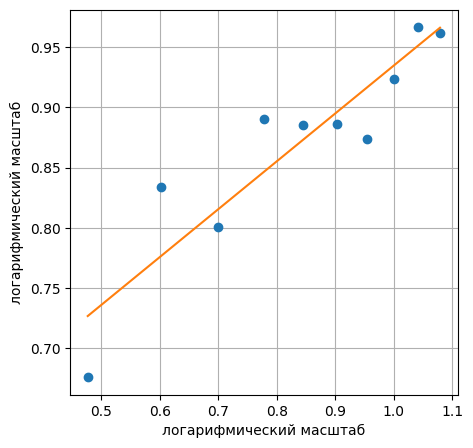

Estimated H = 0.398


In [25]:

# Select a band of lags, which usually ranges from
# very small segments of data, to very long ones, as
lag = np.unique(np.logspace(0.5, 3, 100, dtype=int))

# Notice these must be ints, since these will segment
# the data into chucks of lag size

# Select the power q
q = 2

# The order of the polynomial fitting
order = 1

# Obtain the (MF)DFA as
lag, dfa = MFDFA(yy, lag = lag, q = q, order = order)

# To uncover the Hurst index, lets get some log-log plots

# And now we need to fit the line to find the slope
# in a double logaritmic scales, i.e., you need to
# fit the logs of the results

del_nan = np.argwhere(np.isnan(dfa))
dfa = np.delete(dfa,del_nan[:,0])
lag = np.delete(lag,del_nan[:,0])
H_hat, C_hat = np.polyfit(np.log10(lag)[0:-1],np.log10(dfa[0:-1]),1)

plt.figure(figsize=(5, 5))
plt.plot(np.log10(lag),np.log10(dfa),"o")
tlin = np.linspace(np.log10(lag[0]),np.log10(lag[-1]), num=len(yy))
plt.plot(tlin, H_hat*tlin + C_hat)
plt.xlabel("логарифмический масштаб")
plt.ylabel("логарифмический масштаб")
plt.grid()
plt.show()

print('Estimated H = '+'{:.3f}'.format(H_hat))

# Visualise DFA for timeseries

In [26]:
def calculate_hurst_exponent(series):
    """
    Calculates the Hurst exponent using Multifractal Detrended Fluctuation Analysis (MFDFA).

    Args:
        series (np.ndarray): The time series data.

    Returns:
        float: The Hurst exponent (H_hat) or np.nan if the series is too short or invalid.
    """
    # 2. Inside the function, add a check to ensure the input `series` has at least 10 data points.
    if len(series) < 10 or np.all(np.isnan(series)):
        return np.nan

    # 3. Define the `lag` array, `q`, and `order` for MFDFA calculation.
    lag = np.unique(np.logspace(0.5, 3, 100, dtype=int))
    q = 2
    order = 1

    # 4. Call the `MFDFA` function
    try:
        mfdfa_lag, dfa = MFDFA(series, lag=lag, q=q, order=order)
    except Exception: # Catch potential errors from MFDFA for very short/problematic series
        return np.nan

    # Ensure dfa and mfdfa_lag are 1-dimensional before proceeding
    # This addresses the IndexError if MFDFA returns them as (N, 1) arrays
    if dfa.ndim > 1:
        dfa = dfa.flatten()
    if mfdfa_lag.ndim > 1:
        mfdfa_lag = mfdfa_lag.flatten()

    # 5. Identify and remove `NaN` values from both the `dfa` and `lag` arrays
    # Only consider non-nan values in dfa. mfdfa_lag should correspond.
    valid_indices = ~np.isnan(dfa)
    dfa_filtered = dfa[valid_indices]
    lag_filtered = mfdfa_lag[valid_indices]

    # 6. After removing NaNs, check if there are at least two valid points remaining
    if len(lag_filtered) < 2:
        return np.nan

    # 7. Use `np.polyfit` to perform a linear regression
    # Ensure there are enough points for polyfit after potential filtering and slicing
    if len(lag_filtered) < 2 or len(dfa_filtered) < 2:
        return np.nan

    try:
        # As done in the example, excluding the last element for fitting
        H_hat, C_hat = np.polyfit(np.log10(lag_filtered)[0:-1], np.log10(dfa_filtered)[0:-1], 1)
    except Exception:
        return np.nan

    # 8. Return the calculated `H_hat`.
    return H_hat

print("Function `calculate_hurst_exponent` defined.")

Function `calculate_hurst_exponent` defined.



Iterate through each unique `patient_id` in `raw_data_ts_clean`. For each patient, extract the time series for 'avg_respone_left' and 'avg_respone_right'. Calculate the mean and standard deviation for both response types. Additionally, compute the Hurst exponent (H_hat) for both series using the `calculate_hurst_exponent` function.


In [27]:
# 1. Initialize empty lists to store the patient IDs, mean, standard deviation, and Hurst exponent
unique_patient_ids = raw_data_ts_clean['patient_id'].unique()

avg_respone_left_mean = []
avg_respone_left_std = []
avg_respone_left_hurst = []

avg_respone_right_mean = []
avg_respone_right_std = []
avg_respone_right_hurst = []

patient_ids_processed = []

# 3. Loop through each unique patient_id
for patient_id in unique_patient_ids:
    patient_data = raw_data_ts_clean[raw_data_ts_clean['patient_id'] == patient_id]

    # b. Extract the 'avg_respone_left' series
    series_left = patient_data['avg_respone_left'].values
    # c. Extract the 'avg_respone_right' series
    series_right = patient_data['avg_respone_right'].values

    # d, e, f. Calculate mean, std, and Hurst exponent for 'avg_respone_left'
    if len(series_left) > 0 and not np.all(np.isnan(series_left)):
        avg_respone_left_mean.append(np.nanmean(series_left))
        avg_respone_left_std.append(np.nanstd(series_left))
    else:
        avg_respone_left_mean.append(np.nan)
        avg_respone_left_std.append(np.nan)
    avg_respone_left_hurst.append(calculate_hurst_exponent(series_left))

    # g. Repeat for 'avg_respone_right'
    if len(series_right) > 0 and not np.all(np.isnan(series_right)):
        avg_respone_right_mean.append(np.nanmean(series_right))
        avg_respone_right_std.append(np.nanstd(series_right))
    else:
        avg_respone_right_mean.append(np.nan)
        avg_respone_right_std.append(np.nan)
    avg_respone_right_hurst.append(calculate_hurst_exponent(series_right))

    patient_ids_processed.append(patient_id)

print("Patient data processing complete.")

Patient data processing complete.


In [28]:
result_clustering = []

In [29]:
# 4. Consolidate the statistics into a DataFrame
result_clustering = pd.DataFrame({
    'patient_id': patient_ids_processed,
    'Avg_Resp_Left_Mean': avg_respone_left_mean,
    'Avg_Resp_Left_Std': avg_respone_left_std,
    'Avg_Resp_Left_Hurst': avg_respone_left_hurst,
    'Avg_Resp_Right_Mean': avg_respone_right_mean,
    'Avg_Resp_Right_Std': avg_respone_right_std,
    'Avg_Resp_Right_Hurst': avg_respone_right_hurst
})

# Display the head of the DataFrame
print("DataFrame with patient statistics (head):")
display(result_clustering.head())

# Summarize key findings (will be based on the displayed DataFrame)
print("\nSummary of key findings from computed statistics:")
print(result_clustering.describe())

DataFrame with patient statistics (head):


patient_id  Avg_Resp_Left_Mean  Avg_Resp_Left_Std  Avg_Resp_Left_Hurst  \
0  patient_ 1n           53.259528          12.009135             0.397920   
1  patient_ 2n          123.597025          41.771269             1.163941   
2  patient_ 3n           39.701583          21.652062             1.099086   
3  patient_ 4n           73.540167          23.046395             0.802684   
4  patient_ 5n          100.746296          14.629567             0.809085   

   Avg_Resp_Right_Mean  Avg_Resp_Right_Std  Avg_Resp_Right_Hurst  
0           194.736574           40.132561              1.917325  
1           109.284255           41.218117              1.462129  
2            84.205208           32.102390              1.186651  
3            64.819444           13.978575              1.351294  
4            38.125000           10.383945              0.789748


Summary of key findings from computed statistics:
       Avg_Resp_Left_Mean  Avg_Resp_Left_Std  Avg_Resp_Left_Hurst  \
count           61.000000          61.000000            60.000000   
mean            97.577197          31.433046             1.344654   
std             48.570495          20.247355             0.477394   
min             17.563361           5.387014             0.237006   
25%             64.550536          17.719056             0.969022   
50%             85.810278          24.536111             1.395789   
75%            115.579444          39.732063             1.736484   
max            229.881818          96.455250             2.059395   

       Avg_Resp_Right_Mean  Avg_Resp_Right_Std  Avg_Resp_Right_Hurst  
count            61.000000           61.000000             61.000000  
mean             92.775556           26.918328              1.246598  
std              42.594351           14.670148              0.439197  
min              27.759094            6.595

# Collect to Resulting dataframe

Merge the 'Avg_Resp_DWT_Cluster' and 'Inh_Thresh_DTW_Cluster' labels into the `result_clustering` DataFrame and display the head of the updated DataFrame.

In [30]:
avg_resp_dtw_labels_df = pd.DataFrame(avg_resp_dtw_labels)
#avg_resp_dtw_labels_df = avg_resp_dtw_labels_df.astype(int)


avg_resp_dtw_labels_df = avg_resp_dtw_labels.reset_index()
avg_resp_dtw_labels_df.rename(columns={'index': 'patient_id'}, inplace=True)

In [31]:
aligned_cluster_labels

Avg_Resp_DTW_Cluster  Avg_Resp_DWT_Cluster  \
patient_ 1                       2                     1   
patient_ 10                      0                     1   
patient_ 10n                     1                     0   
patient_ 11                      0                     2   
patient_ 11n                     0                     1   
...                            ...                   ...   
patient_ 8                       1                     0   
patient_ 8n                      1                     0   
patient_ 9                       1                     0   
patient_ 9n                      1                     0   
patient_ 20                     -1                    -1   

              Inh_Thresh_DTW_Cluster  Inh_Thresh_DWT_Cluster  
patient_ 1                         0                       2  
patient_ 10                        1                       1  
patient_ 10n                       1                       1  
patient_ 11                        2                       0  
patient_ 11n                       2                       2  
...                              ...                     ...  
patient_ 8                         0                       2  
patient_ 8n                        1                       1  
patient_ 9                         1                       1  
patient_ 9n                        1                       1  
patient_ 20                        0                       0  

[61 rows x 4 columns]

In [32]:
aligned_cluster_labels_reset = aligned_cluster_labels.reset_index()
# Rename the column created by reset_index from 'index' to 'patient_id'
aligned_cluster_labels_reset.rename(columns={'index': 'patient_id'}, inplace=True)

result_clustering = pd.merge(
    result_clustering,
    aligned_cluster_labels_reset,
    on='patient_id',
    how='left'
)

print("Merged 'Avg_Resp_DWT_Cluster' and other cluster labels into result_clustering DataFrame.")
display(result_clustering.head())

Merged 'Avg_Resp_DWT_Cluster' and other cluster labels into result_clustering DataFrame.


patient_id  Avg_Resp_Left_Mean  Avg_Resp_Left_Std  Avg_Resp_Left_Hurst  \
0  patient_ 1n           53.259528          12.009135             0.397920   
1  patient_ 2n          123.597025          41.771269             1.163941   
2  patient_ 3n           39.701583          21.652062             1.099086   
3  patient_ 4n           73.540167          23.046395             0.802684   
4  patient_ 5n          100.746296          14.629567             0.809085   

   Avg_Resp_Right_Mean  Avg_Resp_Right_Std  Avg_Resp_Right_Hurst  \
0           194.736574           40.132561              1.917325   
1           109.284255           41.218117              1.462129   
2            84.205208           32.102390              1.186651   
3            64.819444           13.978575              1.351294   
4            38.125000           10.383945              0.789748   

   Avg_Resp_DTW_Cluster  Avg_Resp_DWT_Cluster  Inh_Thresh_DTW_Cluster  \
0                     0                     1                       1   
1                     1                     1                       1   
2                     1                     0                       1   
3                     1                     0                       1   
4                     1                     0                       1   

   Inh_Thresh_DWT_Cluster  
0                       1  
1                       1  
2                       1  
3                       1  
4                       2

In [33]:
print("Updated result_clustering DataFrame with cluster labels:")
display(result_clustering.head())

Updated result_clustering DataFrame with cluster labels:


patient_id  Avg_Resp_Left_Mean  Avg_Resp_Left_Std  Avg_Resp_Left_Hurst  \
0  patient_ 1n           53.259528          12.009135             0.397920   
1  patient_ 2n          123.597025          41.771269             1.163941   
2  patient_ 3n           39.701583          21.652062             1.099086   
3  patient_ 4n           73.540167          23.046395             0.802684   
4  patient_ 5n          100.746296          14.629567             0.809085   

   Avg_Resp_Right_Mean  Avg_Resp_Right_Std  Avg_Resp_Right_Hurst  \
0           194.736574           40.132561              1.917325   
1           109.284255           41.218117              1.462129   
2            84.205208           32.102390              1.186651   
3            64.819444           13.978575              1.351294   
4            38.125000           10.383945              0.789748   

   Avg_Resp_DTW_Cluster  Avg_Resp_DWT_Cluster  Inh_Thresh_DTW_Cluster  \
0                     0                     1                       1   
1                     1                     1                       1   
2                     1                     0                       1   
3                     1                     0                       1   
4                     1                     0                       1   

   Inh_Thresh_DWT_Cluster  
0                       1  
1                       1  
2                       1  
3                       1  
4                       2

In [34]:
df = pd.merge(
    result_clustering,
    raw_data[['patient_id', 'pain_type']].dropna(),
    on = 'patient_id', how = 'left'
)

In [35]:
df = df.fillna(2.0)

In [36]:
df.to_csv('tms_timeseries_clusters.csv')

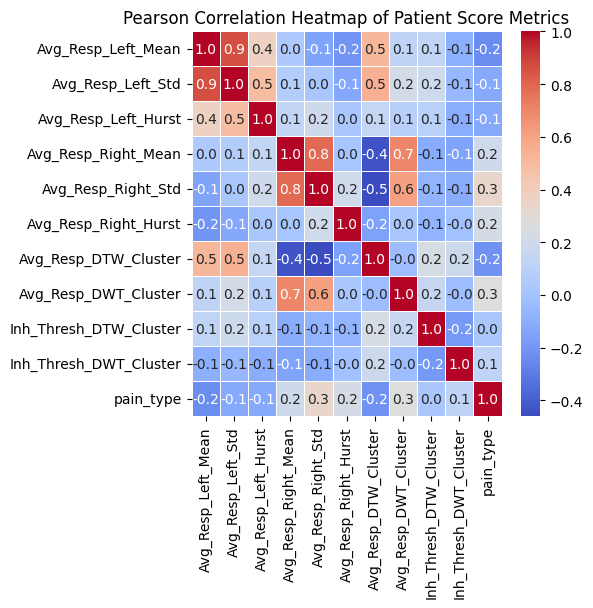

In [37]:
correlation_matrix_scores = df.drop('patient_id',axis=1).corr()

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix_scores, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)
plt.title('Pearson Correlation Heatmap of Patient Score Metrics')
plt.show()

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


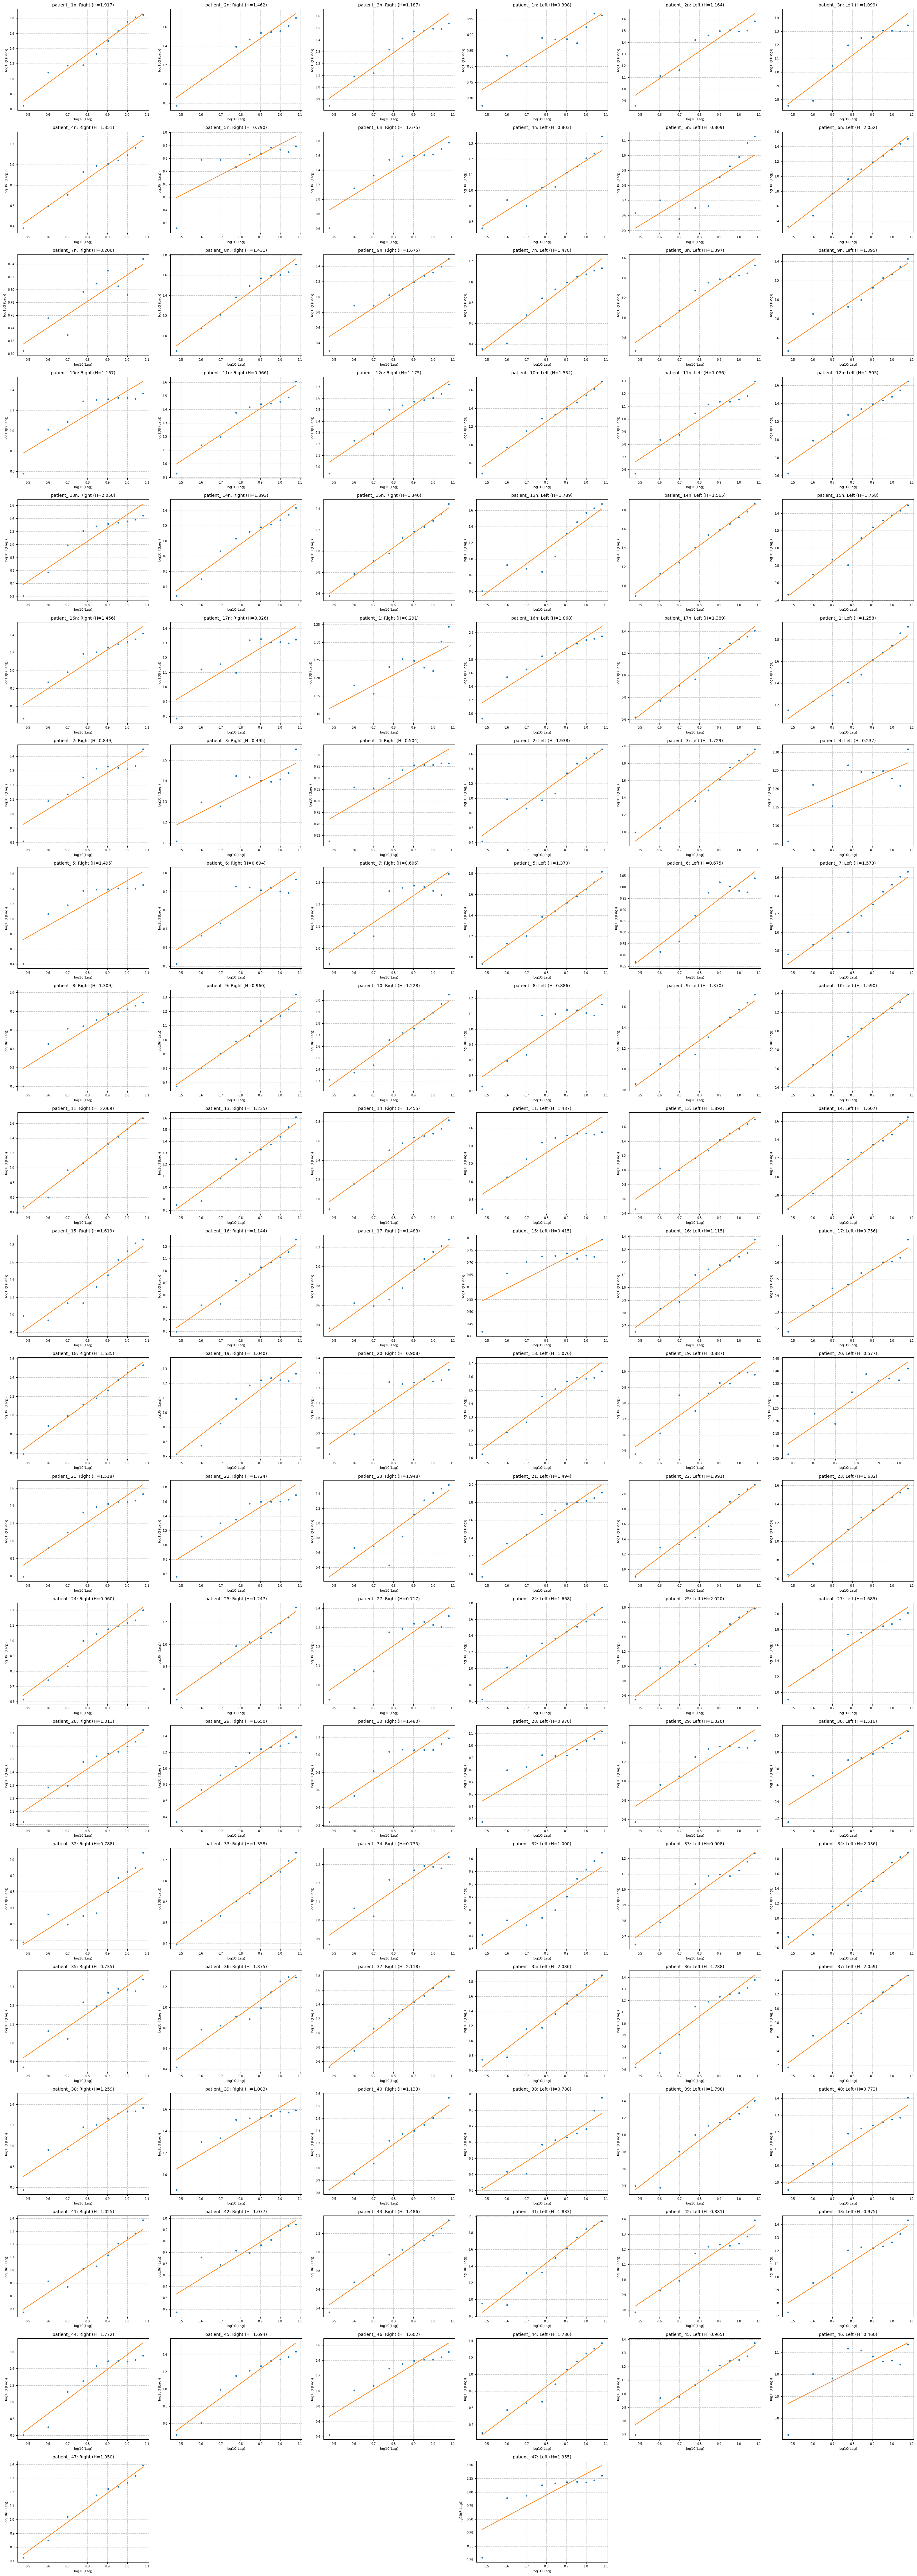

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Helper function for DFA calculation and plotting data extraction
def get_dfa_plot_data(series):
    # Ensure series has at least 10 data points and is not all NaNs
    if len(series) < 10 or np.all(np.isnan(series)):
        return None, None, None, None, None

    lag = np.unique(np.logspace(0.5, 3, 100, dtype=int))
    q = 2
    order = 1

    try:
        mfdfa_lag, dfa = MFDFA(series, lag=lag, q=q, order=order)
    except Exception:
        return None, None, None, None, None

    # Ensure dfa and mfdfa_lag are 1-dimensional
    if dfa.ndim > 1:
        dfa = dfa.flatten()
    if mfdfa_lag.ndim > 1:
        mfdfa_lag = mfdfa_lag.flatten()

    # Filter out NaN values from DFA results
    valid_indices = ~np.isnan(dfa)
    dfa_filtered = dfa[valid_indices]
    lag_filtered = mfdfa_lag[valid_indices]

    # Need at least two valid points for polyfit
    if len(lag_filtered) < 2:
        return None, None, None, None, None

    try:
        # Fit line to log-log data to get Hurst exponent
        H_hat, C_hat = np.polyfit(np.log10(lag_filtered)[0:-1], np.log10(dfa_filtered)[0:-1], 1)
        tlin_fit_x = np.linspace(np.log10(lag_filtered[0]), np.log10(lag_filtered[-1]), num=len(lag_filtered))
        fitted_line_plot = H_hat * tlin_fit_x + C_hat
    except Exception:
        return None, None, None, None, None

    return lag_filtered, dfa_filtered, H_hat, tlin_fit_x, fitted_line_plot

# Main plotting logic
unique_patient_ids = raw_data_ts_clean['patient_id'].unique()
num_patients = len(unique_patient_ids)

# Calculate number of rows needed for the 6-column grid
# Each row will contain plots for up to 3 patients (one right, one left).
# So, num_rows is based on distributing patients across the first 3 columns.
num_rows = int(np.ceil(num_patients / 3))
num_cols = 6  # 3 columns for right response, 3 columns for left response

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows), squeeze=False)

for i, patient_id in enumerate(unique_patient_ids):
    patient_data = raw_data_ts_clean[raw_data_ts_clean['patient_id'] == patient_id]

    series_left = patient_data['avg_respone_left'].dropna().values
    series_right = patient_data['avg_respone_right'].dropna().values

    # Determine subplot row and base column for current patient
    # This distributes patients across the 3 columns for each side (right/left)
    row_plot_idx = i // 3
    col_offset_in_group = i % 3

    # Plot for avg_respone_right (columns 0, 1, 2 within the 6-column grid)
    ax_right = axes[row_plot_idx, col_offset_in_group]
    lag_filtered_right, dfa_filtered_right, H_hat_right, tlin_fit_x_right, fitted_line_plot_right = get_dfa_plot_data(series_right)

    if H_hat_right is not None:
        ax_right.plot(np.log10(lag_filtered_right), np.log10(dfa_filtered_right), "o", markersize=3, label='DFA Fluctuation Function')
        ax_right.plot(tlin_fit_x_right, fitted_line_plot_right, label=f'Fitted Line (H={H_hat_right:.3f})')
        ax_right.set_title(f"{patient_id}: Right (H={H_hat_right:.3f})", fontsize=10)
        ax_right.set_xlabel("log10(Lag)", fontsize=8)
        ax_right.set_ylabel("log10(F(Lag))", fontsize=8)
        ax_right.tick_params(axis='both', which='major', labelsize=7)
        ax_right.grid(True, linestyle='--', alpha=0.7)
        # ax_right.legend(fontsize=7, loc='lower right') # Commenting out legend to save space
    else:
        ax_right.set_title(f"{patient_id}: Right (No DFA Data)", fontsize=10)
        ax_right.text(0.5, 0.5, 'Insufficient data', horizontalalignment='center', verticalalignment='center', transform=ax_right.transAxes, fontsize=9)
        ax_right.axis('off')  # Turn off axis for empty plots

    # Plot for avg_respone_left (columns 3, 4, 5 within the 6-column grid)
    ax_left = axes[row_plot_idx, col_offset_in_group + 3]
    lag_filtered_left, dfa_filtered_left, H_hat_left, tlin_fit_x_left, fitted_line_plot_left = get_dfa_plot_data(series_left)

    if H_hat_left is not None:
        ax_left.plot(np.log10(lag_filtered_left), np.log10(dfa_filtered_left), "o", markersize=3, label='DFA Fluctuation Function')
        ax_left.plot(tlin_fit_x_left, fitted_line_plot_left, label=f'Fitted Line (H={H_hat_left:.3f})')
        ax_left.set_title(f"{patient_id}: Left (H={H_hat_left:.3f})", fontsize=10)
        ax_left.set_xlabel("log10(Lag)", fontsize=8)
        ax_left.set_ylabel("log10(F(Lag))", fontsize=8)
        ax_left.tick_params(axis='both', which='major', labelsize=7)
        ax_left.grid(True, linestyle='--', alpha=0.7)
        # ax_left.legend(fontsize=7, loc='lower right') # Commenting out legend to save space
    else:
        ax_left.set_title(f"{patient_id}: Left (No DFA Data)", fontsize=10)
        ax_left.text(0.5, 0.5, 'Insufficient data', horizontalalignment='center', verticalalignment='center', transform=ax_left.transAxes, fontsize=9)
        ax_left.axis('off')  # Turn off axis for empty plots

# Hide any unused subplots at the end of the grid
# Loop through all possible subplot positions
for r in range(num_rows):
    for c in range(num_cols):
        # Calculate the patient index that would correspond to this subplot position
        # For right plots (cols 0,1,2): patient_idx = r * 3 + c
        # For left plots (cols 3,4,5): patient_idx = r * 3 + (c - 3)

        is_right_side = c < 3
        current_patient_idx = r * 3 + (c if is_right_side else (c - 3))

        if current_patient_idx >= num_patients:
            axes[r, c].axis('off') # Hide subplot if no patient data corresponds to it

plt.tight_layout()
plt.show()

In [39]:
raw_data_ts_clean

patient_id  interstimul_interval  avg_respone_right  avg_respone_left  \
0    patient_ 1n                     2         164.488889         37.698333   
1    patient_ 1n                     3         156.600000         39.340000   
2    patient_ 1n                     4         139.187500         45.480000   
3    patient_ 1n                     5         146.750000         72.320000   
4    patient_ 1n                     6         159.637500         56.240000   
..           ...                   ...                ...               ...   
739  patient_ 47                    10         124.500000         72.600000   
740  patient_ 47                    12         119.911111         69.328571   
741  patient_ 47                    14         101.164444         75.928571   
742  patient_ 47                    17         148.150000         26.044286   
743  patient_ 47                    20         120.367500         28.537143   

     interstimul_threshod  inhibition_threshold_right  \
0                     1.0                        28.2   
1                     1.5                        -4.9   
2                     2.0                        28.2   
3                     2.5                        45.1   
4                     3.0                        -8.2   
..                    ...                         ...   
739                   5.0                        -0.9   
740                   7.0                        -0.9   
741                   NaN                         NaN   
742                   NaN                         NaN   
743                   NaN                         NaN   

     inhibition_threshold_left  
0                         30.3  
1                         -4.1  
2                         15.5  
3                         44.1  
4                         30.3  
..                         ...  
739                      -12.2  
740                       -3.3  
741                        NaN  
742                        NaN  
743                        NaN  

[732 rows x 7 columns]

Patients with pain_type == 2.0: 29
Patients with pain_type != 2.0: 32


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


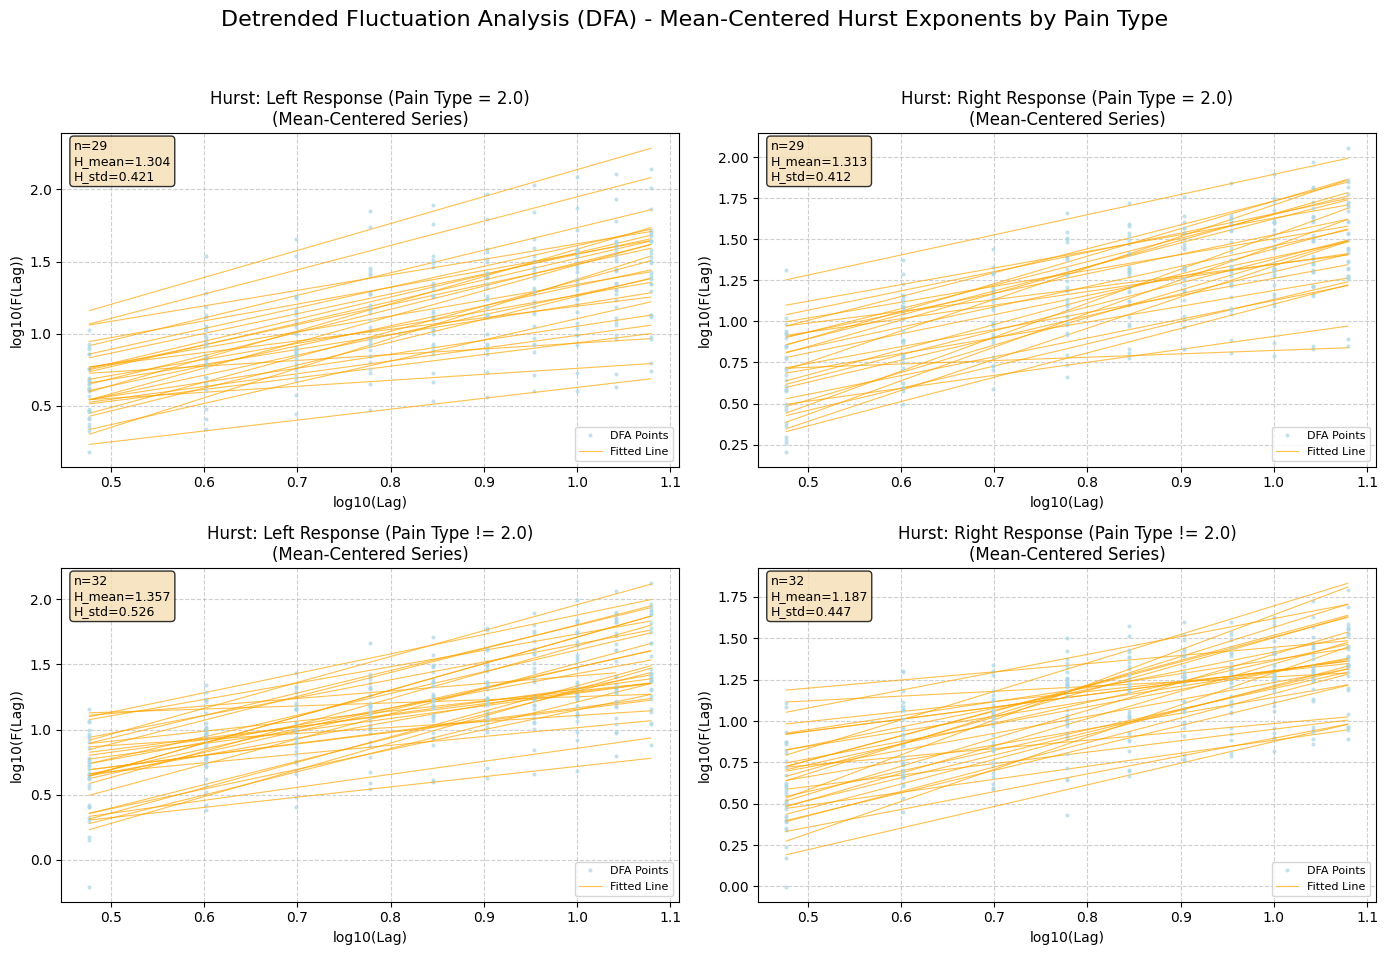


--- Summary of Mean-Centered Hurst Exponents by Group ---
Hurst: Left Response (Pain Type = 2.0)
(Mean-Centered Series): n=29, H_mean=1.304, H_std=0.421
Hurst: Right Response (Pain Type = 2.0)
(Mean-Centered Series): n=29, H_mean=1.313, H_std=0.412
Hurst: Left Response (Pain Type != 2.0)
(Mean-Centered Series): n=32, H_mean=1.357, H_std=0.526
Hurst: Right Response (Pain Type != 2.0)
(Mean-Centered Series): n=32, H_mean=1.187, H_std=0.447


In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming the following are already defined:
# - raw_data_ts_clean (from the txt file)
# - df (from the txt file, contains patient_id and pain_type)
# - get_dfa_plot_data function (from the txt file)
# - MFDFA function is available

# 1. Identify unique patient IDs based on pain_type from the 'df' DataFrame
# This ensures we only consider patients for whom pain_type is available
patients_with_pain_2 = df[df['pain_type'] == 2.0]['patient_id'].unique()
patients_without_pain_2 = df[df['pain_type'] != 2.0]['patient_id'].unique()

print(f"Patients with pain_type == 2.0: {len(patients_with_pain_2)}")
print(f"Patients with pain_type != 2.0: {len(patients_without_pain_2)}")

# 2. Prepare the 2x2 subplot figure
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Detrended Fluctuation Analysis (DFA) - Mean-Centered Hurst Exponents by Pain Type', fontsize=16)

# Define configurations for each subplot
subplot_configs = [
    {
        'ax': axes[0, 0],
        'title': 'Hurst: Left Response (Pain Type = 2.0)\n(Mean-Centered Series)',
        'patient_ids': patients_with_pain_2,
        'side': 'left'
    },
    {
        'ax': axes[0, 1],
        'title': 'Hurst: Right Response (Pain Type = 2.0)\n(Mean-Centered Series)',
        'patient_ids': patients_with_pain_2,
        'side': 'right'
    },
    {
        'ax': axes[1, 0],
        'title': 'Hurst: Left Response (Pain Type != 2.0)\n(Mean-Centered Series)',
        'patient_ids': patients_without_pain_2,
        'side': 'left'
    },
    {
        'ax': axes[1, 1],
        'title': 'Hurst: Right Response (Pain Type != 2.0)\n(Mean-Centered Series)',
        'patient_ids': patients_without_pain_2,
        'side': 'right'
    }
]

# 3. Iterate through configurations to create plots
for config in subplot_configs:
    ax = config['ax']
    title = config['title']
    patient_ids = config['patient_ids']
    side = config['side']

    all_hurst_values = []

    for patient_id in patient_ids:
        # Get the time series data for the specific patient and side from raw_data_ts_clean
        patient_data = raw_data_ts_clean[raw_data_ts_clean['patient_id'] == patient_id]
        series = patient_data[f'avg_respone_{side}'].dropna().values

        # --- Preprocessing: Center the series by subtracting its mean ---
        if len(series) > 0 and not np.all(np.isnan(series)):
             series_mean = np.nanmean(series)
             series_centered = series - series_mean
        else:
            # If series is empty or all NaN after dropna, get_dfa_plot_data will handle it
            series_centered = series

        # Use the provided get_dfa_plot_data function on the *centered* series
        lag_filtered, dfa_filtered, H_hat, tlin_fit_x, fitted_line_plot = get_dfa_plot_data(series_centered)

        if H_hat is not None:
            # Plot the DFA fluctuation function and the fitted line for this patient
            ax.plot(np.log10(lag_filtered), np.log10(dfa_filtered), 'o', markersize=2, alpha=0.6, color='lightblue', label='DFA Points' if patient_id == patient_ids[0] else "")
            ax.plot(tlin_fit_x, fitted_line_plot, '-', linewidth=0.8, alpha=0.7, color='orange', label='Fitted Line' if patient_id == patient_ids[0] else "")
            all_hurst_values.append(H_hat)

    # Customize the subplot
    ax.set_title(title, fontsize=12)
    ax.set_xlabel("log10(Lag)")
    ax.set_ylabel("log10(F(Lag))")
    ax.grid(True, linestyle='--', alpha=0.6)
    if all_hurst_values: # Add legend only if there's data
        ax.legend(loc='lower right', fontsize=8)

    # Add summary statistics box
    if all_hurst_values:
        mean_hurst = np.mean(all_hurst_values)
        std_hurst = np.std(all_hurst_values)
        num_patients = len(all_hurst_values)
        textstr = f'n={num_patients}\nH_mean={mean_hurst:.3f}\nH_std={std_hurst:.3f}'
        props = dict(boxstyle="round,pad=0.3", facecolor="wheat", alpha=0.8)
        ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=9,
                verticalalignment='top', bbox=props)
    else:
        ax.text(0.5, 0.5, 'No valid DFA data', horizontalalignment='center',
                verticalalignment='center', transform=ax.transAxes, fontsize=12, color='red')

# 4. Adjust layout and display the figure
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Make space for the suptitle
plt.show()

# Optional: Print summary statistics for each subplot
print("\n--- Summary of Mean-Centered Hurst Exponents by Group ---")
for config in subplot_configs:
    patient_ids = config['patient_ids']
    side = config['side']
    title = config['title']

    all_hurst_values = []
    for patient_id in patient_ids:
        patient_data = raw_data_ts_clean[raw_data_ts_clean['patient_id'] == patient_id]
        series = patient_data[f'avg_respone_{side}'].dropna().values

        # Preprocess: Center the series
        if len(series) > 0 and not np.all(np.isnan(series)):
             series_mean = np.nanmean(series)
             series_centered = series - series_mean
        else:
             series_centered = series

        _, _, H_hat, _, _ = get_dfa_plot_data(series_centered)
        if H_hat is not None:
            all_hurst_values.append(H_hat)

    if all_hurst_values:
        print(f"{title}: n={len(all_hurst_values)}, H_mean={np.mean(all_hurst_values):.3f}, H_std={np.std(all_hurst_values):.3f}")
    else:
        print(f"{title}: No valid DFA data points.")